## Bluesky RunEngine setup

In [1]:


# Import bluesky and ophyd
import matplotlib.pyplot as plt
from bluesky import RunEngine
from bluesky.run_engine import get_bluesky_event_loop
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.plan_stubs import *
from bluesky.plans import *

import asyncio


from bluesky.utils import ProgressBarManager
from secop_ophyd.SECoPDevices import SECoP_Node_Device



 

# Create a run engine, with plotting, progressbar and transform
RE = RunEngine({})
bec = BestEffortCallback()
RE.subscribe(bec)
RE.waiting_hook = ProgressBarManager()
RE.ignore_callback_exceptions = False
plt.ion()


Extend DSO search path to '/home/qfj/git-repos/secop-ophyd/.venv/lib/python3.10/site-packages/epicscorelibs/lib'
Using selector: EpollSelector


### ophyd-SECoP Device generation

In [3]:
cryoNode = SECoP_Node_Device.create(host='localhost',port ='10769',loop= RE.loop)

cryo_7.frappy.demo ready


### Count Plan

Executing plan <generator object count at 0x7fe237a86500>
Change state on <bluesky.run_engine.RunEngine object at 0x7fe23f5b4220> from 'idle' -> 'running'
stage(<secop_ophyd.SECoPDevices.SECoP_Node_Device object at 0x7fe26972f940>, *() **{'group': '31057866-8136-41f1-9045-1fd578bf2723'}, run=None)
wait(None, *() **{'group': '31057866-8136-41f1-9045-1fd578bf2723'}, run=None)
The object <secop_ophyd.SECoPDevices.SECoP_Node_Device object at 0x7fe26972f940> reports 'stage' is done with status True.
open_run(None, *() **{'detectors': ['cryo_7-frappy-demo-cryo'], 'num_points': 25, 'num_intervals': 24, 'plan_args': {'detectors': ['<secop_ophyd.SECoPDevices.SECoPMoveableDevice object at 0x7fe237815990>'], 'num': 25}, 'plan_name': 'count', 'hints': {'dimensions': [(('time',), 'primary')]}}, run=None)


Transient Scan ID: 2     Time: 2024-02-27 15:31:18
Persistent Unique Scan ID: '937c60b1-e2f1-4d4c-adc1-cb7c7b729367'
[start] document is emitted (run_uid='937c60b1-e2f1-4d4c-adc1-cb7c7b729367')
c

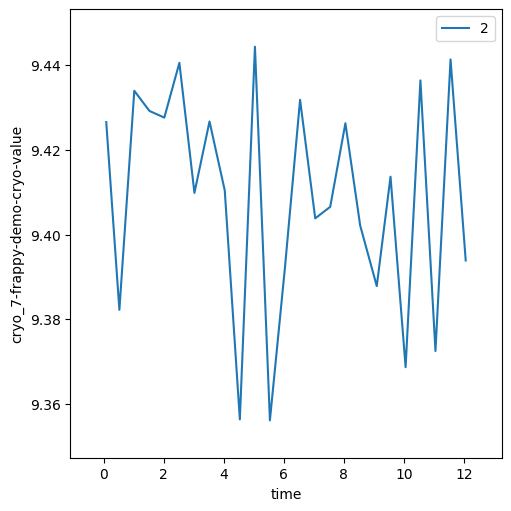

In [5]:
# get readings of cryo.value (0.5/s)
p = RE(count([cryoNode.cryo],num=25,delay=0.5))

### Scan Plan



Transient Scan ID: 2     Time: 2023-06-13 17:20:44
Persistent Unique Scan ID: 'ffc158a2-c9a3-4818-9d92-674c76f69ce8'
New stream: 'primary'
+-----------+------------+-------------------------------+
|   seq_num |       time | cryo_7-frappy-demo-cryo-value |
+-----------+------------+-------------------------------+
|         1 | 17:20:44.1 |                        10.023 |

                                                                               
|         2 | 17:21:13.5 |                        10.187 |

                                                                               
|         3 | 17:21:47.6 |                        10.452 |

                                                                               
|         4 | 17:22:17.7 |                        10.751 |

                                                                               
|         5 | 17:22:48.9 |                        10.952 |
+-----------+------------+-------------------------------+
gene

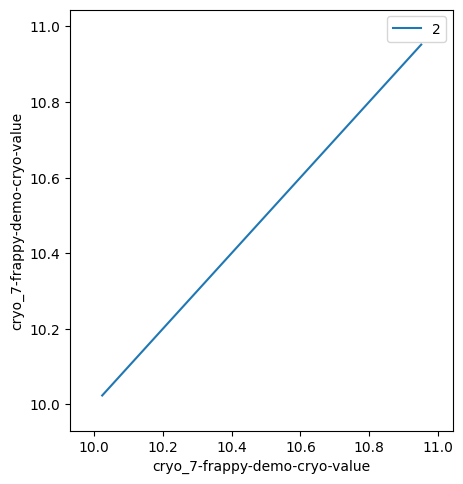

In [4]:
# drive from 10K to 11K in five steps 
p = RE(scan([cryoNode.cryo],cryoNode.cryo,10,11,5))

In [ ]:
cryoNode